# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.utils import resample

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
print('shape:', df.shape)
df.head()

shape: (130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?
Yes, the distribution is normal.

Upon visual inspection, the histogram of body temperature seems fairly normal with a mean around 98.5 degress.  The QQ plot shows that temperature quantiles are aligned with the theoretical quantiles for a normal distribution with the exception of a couple measurements on the extremes.  The Shapiro-Wilk test evaluates the hypothesis that the samples are drawn from a normal distribution. A p-value of 0.233 shows that we can accept the null hypothesis that the distribution is normal.

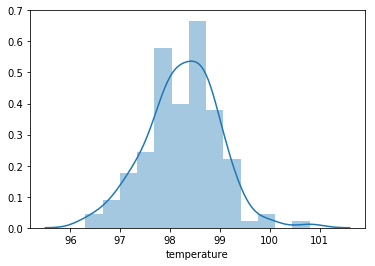

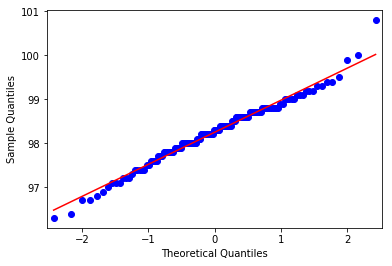

shapiro p-value: 0.233174666762352


In [3]:
sns.distplot(df['temperature'])

a = np.random.normal(5,5,250)
sm.qqplot(df['temperature'], line = 's')
plt.show()

print('shapiro p-value:', shapiro(df['temperature'])[1])

## 2.  Is the sample size large? Are the observations independent?
The sample size of 130 is large enough, and the observations are independent.  One person's height and temperature should not affect that of another person.

## 3. Is the true population mean really 98.6 degrees F?

Is the true population mean really 98.6 degrees F?

<b> bootstrap hypothesis test</b>
<br>
Of 1000 samples of size 130 from a population where true mean was 98.6 degrees, 0 had a sample mean of 98.24 or less.  Therefore, the bootstrap tests suggests, the true population mean is not 98.6 degrees


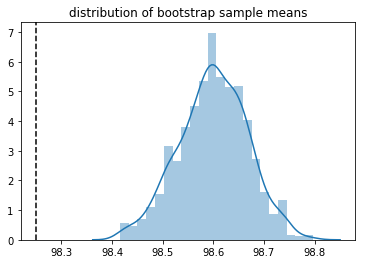

If true population mean was 98.6, there is 0.0 chance we would get sample mean as extreme as 98.24923076923078


In [4]:
#bootstrap testing
#shift sample population so mean is actually 98.6
shift = 98.6 - df['temperature'].mean()
bootstrap_pops = df['temperature'] + shift

#calculate sample means of 1000 bootstrap samples
sample_means = []
for i in range(1,1001):
    boot_sample = resample(bootstrap_pops, replace=True, n_samples=130)
    sample_means.append(boot_sample.mean())

#plot results
sns.distplot(sample_means)
plt.axvline(df['temperature'].mean(), color = 'k', linestyle = '--')
plt.title('distribution of bootstrap sample means')
plt.show()

#calculate p-value
sample_means = np.array(sample_means)
p_value = (sample_means <= df['temperature'].mean()).sum()/len(sample_means)

print('If true population mean was 98.6, there is %s chance we would get sample mean as extreme as %s' %(p_value*100, df['temperature'].mean()))

<b> frequentist statistical testing with t-test</b>

It is appropriate to use the t-test because we don't actually know the population standard deviation.  We need to estimate it from our sample.  According to t-test, the p-value is 2.4*10^-7 and we reject the null hypothesis that the population mean is 98.6 degress.

In [5]:
#t-test
from scipy import stats
tstat, p_value = stats.ttest_1samp(df.temperature,popmean = 98.6)
print('t-test p_value:', p_value)

t-test p_value: 2.4106320415561276e-07


<b> frequentist statistical testing with z-test</b>

The z-test assumes we don't have to estimate the population standard deviation from the sample.  If we assume the sample and population standard deviations are the same, we can use the z-test.  According to z-test, the p-value is 4.9*10^-8 and we reject the null hypothesis that the population mean is 98.6 degress.  This is a smaller p-value than the t-test because the t-test builds in uncertaintly about the population standard deviation and produces a larger confidence interval.

In [6]:
#z-test
from statsmodels.stats.weightstats import ztest
zstat, p_value = ztest(df.temperature,value=98.6)
print('z-test p_value:', p_value)

z-test p_value: 4.9021570141012155e-08


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

The t-test is still the correct one to use because your sample standard deviation may not be similar to the population standard deviation.  The difference between the sample and population standard deviations is likely bigger the smaller your sample.  Therefore, the t-test and z-test differences may be more noticeable.

In [7]:
small_sample = resample(df.temperature, replace=True, n_samples=10, random_state = 123)

In [8]:
#t-test
from scipy import stats
tstat, p_value = stats.ttest_1samp(small_sample,popmean = 98.6)
print('t-test p_value:', p_value)

t-test p_value: 0.12675736026885132


In [9]:
#z-test
from statsmodels.stats.weightstats import ztest
zstat, p_value = ztest(small_sample,value=98.6)
print('z-test p_value:', p_value)

z-test p_value: 0.09246452268183201


## 5. At what temperature should we consider someone's temperature to be "abnormal"?

Per the bootstrap approach, abnormal temperatures are < 97.1 or > 99.2 degrees
<br>
Per the frequentist approach, abnormal temperatures are < 96.8 or > 99.6 degrees

In [10]:
#bootstrap approach
samples = []
for i in range(1,1001):
    boot_sample = resample(df['temperature'].values, replace=True, n_samples=1)
    samples.append(boot_sample)
samples = np.array(samples)

print('bootstrap results:', '<', np.percentile(samples, 5), 'or >', np.percentile(samples, 95))

bootstrap results: < 97.1 or > 99.3


In [11]:
#frequentist approach
sample_std = np.std(df['temperature'])
sample_mean = df['temperature'].mean()
print('frequentist results:', '<', sample_mean - 1.96*sample_std, 'or >', sample_mean + 1.96*sample_std)

frequentist results: < 96.8177295225769 or > 99.68073201588466


## 6. Is there a significant difference between males and females in normal temperature?

I did a 2-sample t-test. This tests whether two independent samples (males vs females) have the same mean.  A p-value of 0.02 suggests that they have different means. However, the observed difference in means is 0.2 degrees.  This small difference in temperature may be statistically significant, but its not clear if its meaningful.  

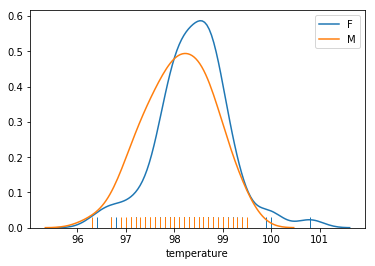

male mean: 98.1046153846154
female mean: 98.39384615384613


In [12]:
sns.distplot(df.loc[df['gender'] == 'F', 'temperature'], hist=False, rug=True, label = 'F')
sns.distplot(df.loc[df['gender'] == 'M', 'temperature'], hist=False, rug=True, label = 'M')
plt.show()
print('male mean:', df.loc[df['gender'] == 'M', 'temperature'].mean())
print('female mean:', df.loc[df['gender'] == 'F', 'temperature'].mean())

In [13]:
tstat, p_value = stats.ttest_ind(df.loc[df['gender'] == 'F', 'temperature'],df.loc[df['gender'] == 'M', 'temperature'], equal_var = False)
print('t-test p-value:', p_value)

t-test p-value: 0.023938264182934196
